In [2]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/interpreted_seismics_2/linhas_sismicas/teste_1/"
nome_modelo = "BES-Seismics-Linhas-Luis_Teste-2"
geo_model = gp.create_model(nome_modelo)

### Detalhes dos dados
- Contém os horizontes 1, 2 e 27 gerado do dionisos e convertido para .csv
- Todos os horizontes foram reduzidos em X e Y para diminuir a quantidade de pontos (1000)
- O Z dos horizontes 2 e 27 foram ajustados (-mil e - 2mil, respectivamente)
- Cada horizonte (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy (Quando salvar a orientação gerada, precisa trocar o header surfaces para formation, se for abrir o .csv ao invés de rodar sempre o KNN)

## Step by step

In [3]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[430853.238, 474205.662, 7782391.412, 7798379.78, -6544.67, -2566.97],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_200m.csv",
    #path_o=data_path + "orientations_points_2.csv",
)

Active grids: ['regular']


BES-Seismics-Luis_Teste-1  2024-03-25 23:01

In [4]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,MAASTRICHTIANO,Default series,1,#015482,1
1,TURANIANO,Default series,2,#9f0052,2
2,CENOMANIANO,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [5]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("MAASTRICHTIANO",),
        "Strat_Series_2": ("TURANIANO",),
        "Strat_Series_3": ("CENOMANIANO",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,MAASTRICHTIANO,Strat_Series_1,1,#015482,1
1,TURANIANO,Strat_Series_2,1,#9f0052,2
2,CENOMANIANO,Strat_Series_3,1,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [6]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series_1,1,Erosion,False,False,False
Strat_Series_2,2,Erosion,False,False,False
Strat_Series_3,3,Erosion,False,False,False
Basement_series,4,Erosion,False,False,False


In [7]:
geo_model.get_data()

X         Y        Z    smooth         surface   
surface_points 0     440716.01  7.80e+06 -3327.57  2.00e-06  MAASTRICHTIANO  \
               1     440803.51  7.80e+06 -3326.95  2.00e-06  MAASTRICHTIANO   
               2     441003.52  7.80e+06 -3325.54  2.00e-06  MAASTRICHTIANO   
               3     441203.53  7.80e+06 -3332.95  2.00e-06  MAASTRICHTIANO   
               4     441403.54  7.80e+06 -3348.99  2.00e-06  MAASTRICHTIANO   
...                        ...       ...      ...       ...             ...   
               5498  473205.64  7.79e+06 -6091.86  2.00e-06     CENOMANIANO   
               5499  473405.65  7.79e+06 -6103.72  2.00e-06     CENOMANIANO   
               5500  473605.66  7.79e+06 -6117.37  2.00e-06     CENOMANIANO   
               5501  473805.67  7.79e+06 -6131.02  2.00e-06     CENOMANIANO   
               5502  474005.67  7.79e+06 -6144.67  2.00e-06     CENOMANIANO   

                     G_x  G_y  G_z  
surface_points 0     NaN  NaN  NaN  
               1     NaN  NaN  NaN  
               2     NaN  NaN  NaN  
               3     NaN  NaN  NaN  
               4     NaN  NaN  NaN  
...                  ...  ...  ...  
               5498  NaN  NaN  NaN  
               5499  NaN  NaN  NaN  
               5500  NaN  NaN  NaN  
               5501  NaN  NaN  NaN  
               5502  NaN  NaN  NaN  

[5503 rows x 8 columns]

- Precisar criar os pontos de orientação com o código abaixo

In [8]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [10]:
geo_model.get_data()

X         Y        Z    smooth         surface   
surface_points 0     440716.01  7.80e+06 -3327.57  2.00e-06  MAASTRICHTIANO  \
               1     440803.51  7.80e+06 -3326.95  2.00e-06  MAASTRICHTIANO   
               2     441003.52  7.80e+06 -3325.54  2.00e-06  MAASTRICHTIANO   
               3     441203.53  7.80e+06 -3332.95  2.00e-06  MAASTRICHTIANO   
               4     441403.54  7.80e+06 -3348.99  2.00e-06  MAASTRICHTIANO   
...                        ...       ...      ...       ...             ...   
orientations   1769  473205.64  7.79e+06 -6091.86  1.00e-02     CENOMANIANO   
               1770  473405.65  7.79e+06 -6103.72  1.00e-02     CENOMANIANO   
               1771  473605.66  7.79e+06 -6117.37  1.00e-02     CENOMANIANO   
               1772  473805.67  7.79e+06 -6131.02  1.00e-02     CENOMANIANO   
               1773  474005.67  7.79e+06 -6144.67  1.00e-02     CENOMANIANO   

                      G_x   G_y  G_z  
surface_points 0      NaN   NaN  NaN  
               1      NaN   NaN  NaN  
               2      NaN   NaN  NaN  
               3      NaN   NaN  NaN  
               4      NaN   NaN  NaN  
...                   ...   ...  ...  
orientations   1769  0.06 -0.02  1.0  
               1770  0.06 -0.02  1.0  
               1771  0.06 -0.02  1.0  
               1772  0.06 -0.03  1.0  
               1773  0.06 -0.03  1.0  

[11006 rows x 8 columns]

In [11]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
orientations_p = geo_model.orientations.df
orientations_p.to_csv(data_path + "orientations_points.csv")
orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
1774,440716.01,7.80e+06,-3327.57,0.36,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
1775,440803.51,7.80e+06,-3326.95,0.36,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
1776,441003.52,7.80e+06,-3325.54,0.37,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
1777,441203.53,7.80e+06,-3332.95,0.37,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
1778,441403.54,7.80e+06,-3348.99,0.37,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,473205.64,7.79e+06,-6091.86,0.74,0.44,0.48,5.80e-02,-0.02,9.98e-01,3.58,111.53,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1770,473405.65,7.79e+06,-6103.72,0.74,0.44,0.48,5.78e-02,-0.02,9.98e-01,3.54,110.49,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1771,473605.66,7.79e+06,-6117.37,0.74,0.44,0.48,5.78e-02,-0.02,9.98e-01,3.54,110.49,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1772,473805.67,7.79e+06,-6131.02,0.75,0.44,0.48,6.42e-02,-0.03,9.98e-01,3.96,111.42,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01


In [12]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
orientations_p_formation = orientations_p.copy()
orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
orientations_p_formation.to_csv(data_path + "orientations_points_2.csv")
orientations_p_formation

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,smooth
1774,440716.01,7.80e+06,-3327.57,0.36,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
1775,440803.51,7.80e+06,-3326.95,0.36,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
1776,441003.52,7.80e+06,-3325.54,0.37,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
1777,441203.53,7.80e+06,-3332.95,0.37,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
1778,441403.54,7.80e+06,-3348.99,0.37,0.59,0.51,7.27e-05,-1.00,3.77e-04,89.98,180.00,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,473205.64,7.79e+06,-6091.86,0.74,0.44,0.48,5.80e-02,-0.02,9.98e-01,3.58,111.53,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1770,473405.65,7.79e+06,-6103.72,0.74,0.44,0.48,5.78e-02,-0.02,9.98e-01,3.54,110.49,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1771,473605.66,7.79e+06,-6117.37,0.74,0.44,0.48,5.78e-02,-0.02,9.98e-01,3.54,110.49,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01
1772,473805.67,7.79e+06,-6131.02,0.75,0.44,0.48,6.42e-02,-0.03,9.98e-01,3.96,111.42,1.0,CENOMANIANO,Strat_Series_3,3.0,3.0,0.01


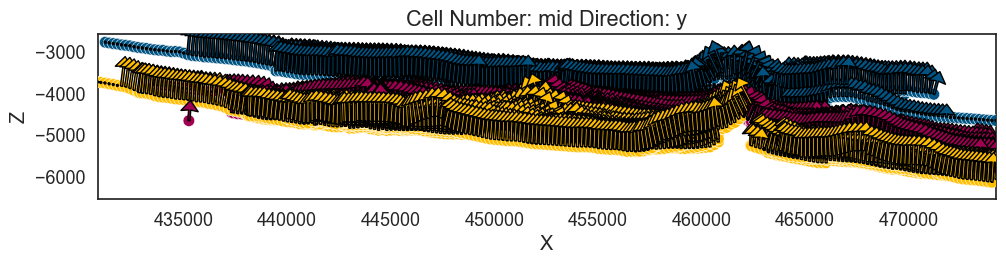

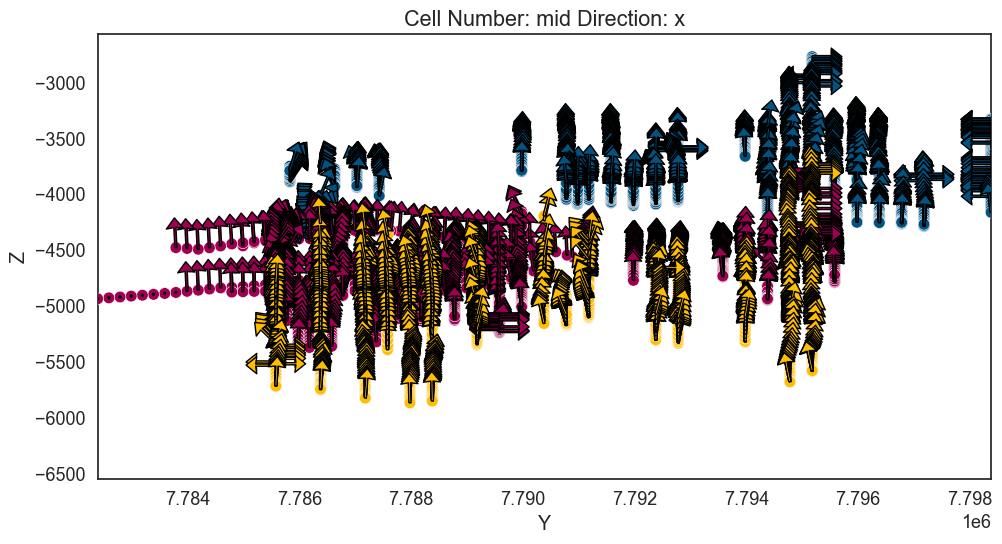

In [13]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [14]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [15]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                46377.61
$C_o$             51211492.27
drift equations  [3, 3, 3, 3]
CPU times: total: 18.9 s
Wall time: 20.6 s


In [16]:
geo_model.update_to_interpolator()

True

In [17]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 32min 10s
Wall time: 7min 43s



Lithology ids 
  [4. 4. 4. ... 1. 1. 1.] 

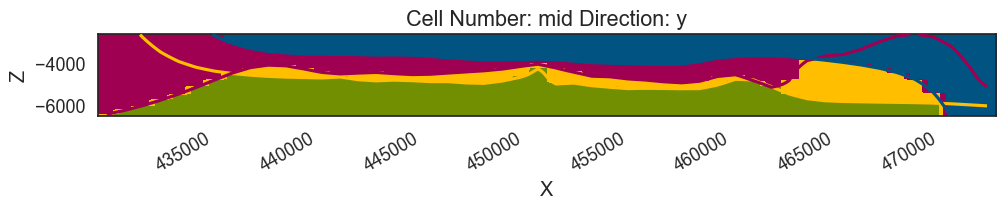

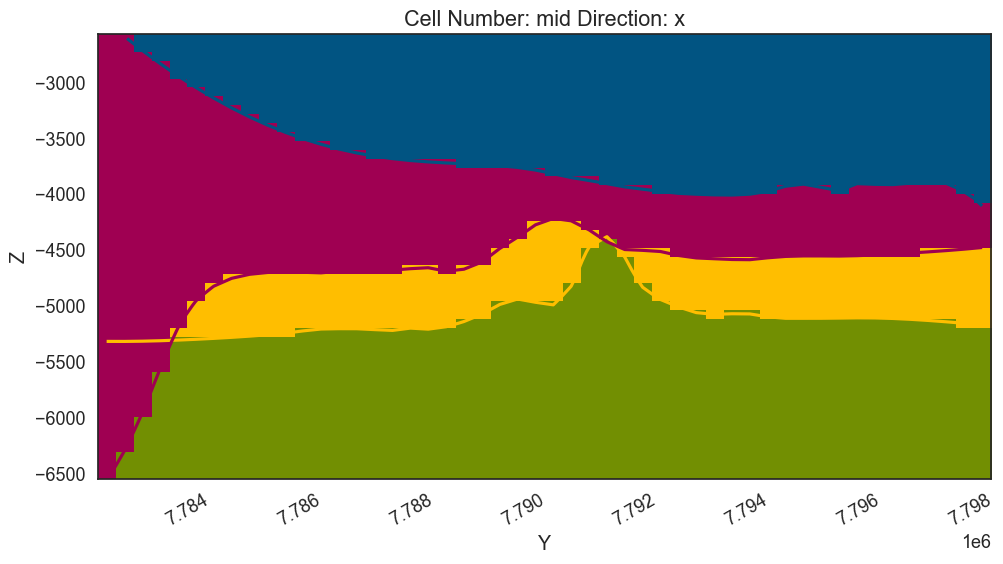

In [18]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [19]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [20]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

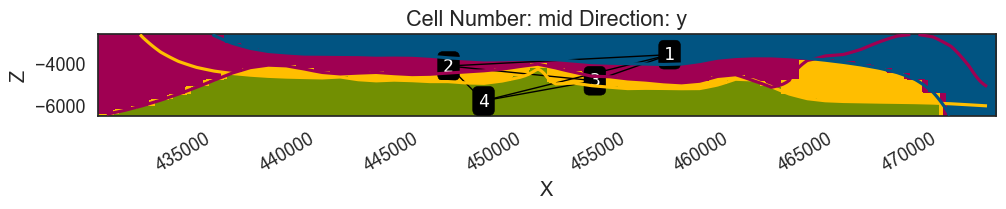

In [22]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

- Salvando pelo GemPy e em pickle

In [19]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

True

In [1]:
import pickle
save_path = "../../../../../output/BES/interpreted_seismics_2"
with open(save_path + "Dionisos_BES_Grid_v1.0.0", "wb") as f:
    pickle.dump(geo_model, f)

NameError: name 'geo_model' is not defined